In [58]:
!python --version

Python 3.11.3


Lets get the basic data loaded

In [59]:
# Not really needed
# !pip install kaggle

Lets get the Kaggle token installed. Manually move the kaggle jason file to the root .kaggle folder.

Lets download the data

In [60]:
# Only needed the first time
# !kaggle competitions download -c spaceship-titanic

Now to unzip it.

In [61]:
# !unzip ./spaceship-titanic.zip

Cool. Lets get the basic data into a dataframe.

In [62]:
import pandas as pd
import numpy as np
tdata = pd.read_csv('train.csv')

In [63]:
tdata.shape

(8693, 14)

In [64]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Lets get some basic summary statistics going.

In [65]:
tdata.describe(include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Lets check for missing values

In [66]:
tdata.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [67]:
tdata.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Feature Engineering

Lets get some basic feature engineering going.

First up, lets get the cabin sorted out into decks, cabin numbers and side of the ship.

In [68]:
tdata['Cabin'][:10]

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [69]:
#Re-writing this to make it a function
def split_cabin (df):
    df[['Cabin_Deck', 'Cabin_number', 'Cabin_side']] = df['Cabin'].str.split('/',expand=True)
    return df

Alright, lets get Passenger group sorted. I think we need to get this into two columns. Group_size and # of Family.

In [70]:
# Re-writing to make this a function
def passenger_group(df):
    df[['PassengerID_Group','PassengerID_Number']] = df['PassengerId'].str.split('_',expand=True)
    return df

In [71]:
# Re-writing to make it a function
def add_party_size (df):

    def get_party_size(grp):
        ans = []
        for grp_id in grp:
            ans.append(len(tdata.loc[tdata['PassengerID_Group'] == grp_id]))
        return ans

    df['PassengerID_GroupSize'] = get_party_size(df['PassengerID_Group'])
    df['PassengerID_GroupSize'] = df['PassengerID_GroupSize'].astype(float)
    return df

Lets get a function going to take care of the NaNs for all continuous variables

In [72]:
def add_zeros_cont(df):
    a = (df.isna().sum()>0) & (df.dtypes == 'float64')
    for i,v in a.items():
        if v is True:
            df[i] = df[i].fillna(0)
    return df

In [73]:
# Testing before
# (tdata.isna().sum()>0) & (tdata.dtypes == 'float64')

In [74]:
# add_zeros_cont(tdata)
# Testing after
# (tdata.isna().sum()>0) & (tdata.dtypes == 'float64')

In [75]:
# Function to get rid of NA for the bool types.
def boolify (df):
    df['VIP']=df['VIP'].astype('bool')
    df['CryoSleep']=df['CryoSleep'].astype('bool')
    return df

To do: Add a column for missing values.

In [76]:
# Function to Turn bool columns into into ints.
def intify (df):
    df['VIP']=df['VIP'].fillna(0)
    df['VIP']=df['VIP'].astype('int64')
    df['CryoSleep']=df['CryoSleep'].fillna(0)
    df['CryoSleep']=df['CryoSleep'].astype('int64')
    if 'Transported' in df.columns: 
        df['Transported']=df['Transported'].astype('int64')
    return df

Ok lets call all the feature eng functions together.

In [77]:
def add_features(df):
    add_zeros_cont(tdata)
    # boolify(df)
    intify(df)
    split_cabin(df)
    passenger_group(df)
    add_party_size (df)
    #Function to clean up 0s for continuous variables
    df['Total_Spend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    df['Log_Total_Spend'] = np.log1p(df['Total_Spend'])
    return df.head()

add_features(tdata)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,Maham Ofracculy,0,B,0,P,0001,01,1.0,0.0,0.000000
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,Juanna Vines,1,F,0,S,0002,01,1.0,736.0,6.602588
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,Altark Susent,0,A,0,S,0003,01,2.0,10383.0,9.248021
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,Solam Susent,0,A,0,S,0003,02,2.0,5176.0,8.551981
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,Willy Santantines,1,F,1,S,0004,01,1.0,1091.0,6.995766


In [78]:
tdata.dtypes

PassengerId               object
HomePlanet                object
CryoSleep                  int64
Cabin                     object
Destination               object
Age                      float64
VIP                        int64
RoomService              float64
FoodCourt                float64
ShoppingMall             float64
Spa                      float64
VRDeck                   float64
Name                      object
Transported                int64
Cabin_Deck                object
Cabin_number              object
Cabin_side                object
PassengerID_Group         object
PassengerID_Number        object
PassengerID_GroupSize    float64
Total_Spend              float64
Log_Total_Spend          float64
dtype: object

In [79]:
tdata.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,Maham Ofracculy,0,B,0,P,0001,01,1.0,0.0,0.000000
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,Juanna Vines,1,F,0,S,0002,01,1.0,736.0,6.602588
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,Altark Susent,0,A,0,S,0003,01,2.0,10383.0,9.248021
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,Solam Susent,0,A,0,S,0003,02,2.0,5176.0,8.551981
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,Willy Santantines,1,F,1,S,0004,01,1.0,1091.0,6.995766


Lets take a closer look at Cabin_number.

In [80]:
tdata['Cabin_number'].describe()

count     8494
unique    1817
top         82
freq        28
Name: Cabin_number, dtype: object

In [81]:
deep_dive = tdata[tdata['Cabin_number'] == '82']
deep_dive.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
326,0368_01,Mars,0,F/82/P,TRAPPIST-1e,26.0,0,2832.0,107.0,4447.0,...,Resers Perte,0,F,82,P,0368,01,2.0,7405.0,8.910046
327,0368_02,Mars,1,F/82/P,TRAPPIST-1e,61.0,0,0.0,0.0,0.0,...,Batech Perte,1,F,82,P,0368,02,2.0,0.0,0.000000
492,0531_01,Earth,1,G/82/P,55 Cancri e,1.0,0,0.0,0.0,0.0,...,Estine Alentonway,0,G,82,P,0531,01,2.0,0.0,0.000000
493,0531_02,Earth,1,G/82/P,55 Cancri e,0.0,0,0.0,0.0,0.0,...,Darley Alentonway,1,G,82,P,0531,02,2.0,0.0,0.000000
525,0561_01,Earth,0,G/82/S,TRAPPIST-1e,22.0,0,0.0,0.0,332.0,...,Jessa Flemaney,0,G,82,S,0561,01,1.0,774.0,6.652863


Ok lets get rid of Cabin number - seems to not be predictive.

Cool. Lets get a basic learning model going.

In [82]:
cat_vars = list(tdata.select_dtypes(['object','bool', 'int64']).columns)
cat_vars.remove('Name')
cat_vars.remove('PassengerId')
cat_vars.remove('Transported')
cat_vars.remove('Cabin')
cat_vars.remove('PassengerID_Group')
cat_vars.remove('Cabin_number')
# Lets add this back in.
# cat_vars.remove('PassengerID_Number')
# print(cat_vars)
print(f"Category variables are: \n {cat_vars}")

cont_vars = list(tdata.select_dtypes(['float']).columns)
cont_vars.remove('Total_Spend')
# print(cont_vars)
print(f"Continous variables are: \n {cont_vars}")

# not_used_vars = ['Name','PassengerId', 'Cabin', 'PassengerID_Group', 'PassengerID_Number']
not_used_vars = ['Name','PassengerId', 'Cabin', 'PassengerID_Group', 'Cabin_number', 'Total_Spend']
# print(not_used_vars)
print(f"Unused variables are: \n {not_used_vars}")

total_columns = len(cont_vars)+len(cat_vars)+len(not_used_vars)
print(total_columns)
tdata.shape

Category variables are: 
 ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_side', 'PassengerID_Number']
Continous variables are: 
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'PassengerID_GroupSize', 'Log_Total_Spend']
Unused variables are: 
 ['Name', 'PassengerId', 'Cabin', 'PassengerID_Group', 'Cabin_number', 'Total_Spend']
21


(8693, 22)

In [83]:
tdata['Transported'].dtype

dtype('int64')

In [84]:
# dep_vars = list(tdata.select_dtypes('bool').columns)
dep_vars = ['Transported']
print(dep_vars)

['Transported']


Lets get the dataframe updated to store the categorical correctly.

In [85]:
def make_category (df, cat_list):
    for cat in cat_list:
        #Remove bool columns.
        if df[cat].dtypes == ('object'):
            df[cat] = pd.Categorical(df[cat])

In [86]:
make_category (tdata, cat_vars)

In [87]:
tdata.dtypes

PassengerId                object
HomePlanet               category
CryoSleep                   int64
Cabin                      object
Destination              category
Age                       float64
VIP                         int64
RoomService               float64
FoodCourt                 float64
ShoppingMall              float64
Spa                       float64
VRDeck                    float64
Name                       object
Transported                 int64
Cabin_Deck               category
Cabin_number               object
Cabin_side               category
PassengerID_Group          object
PassengerID_Number       category
PassengerID_GroupSize     float64
Total_Spend               float64
Log_Total_Spend           float64
dtype: object

Lets get some data visualizations going

In [88]:
# !pip install seaborn

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

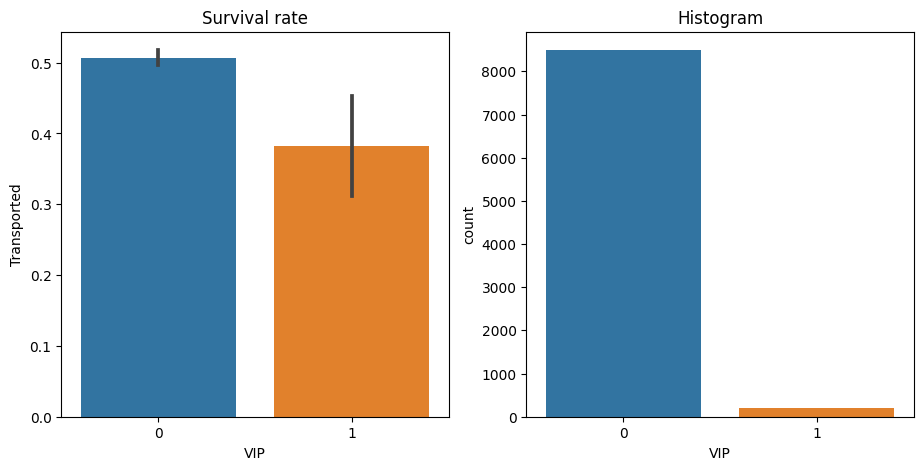

In [90]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=tdata, y="Transported", x="VIP", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=tdata, x="VIP", ax=axs[1]).set(title="Histogram");

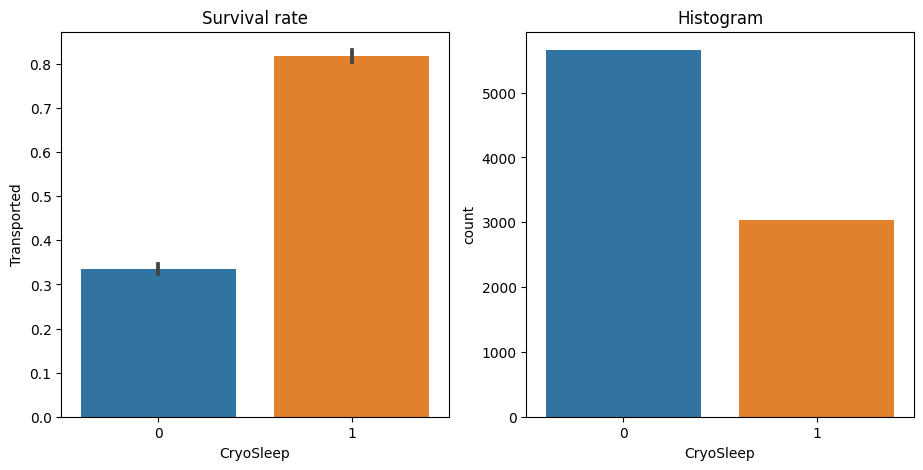

In [91]:
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=tdata, y="Transported", x="CryoSleep", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=tdata, x="CryoSleep", ax=axs[1]).set(title="Histogram");

Lets plot a continous variable. In this case total spend.

<Axes: xlabel='Log_Total_Spend', ylabel='Density'>

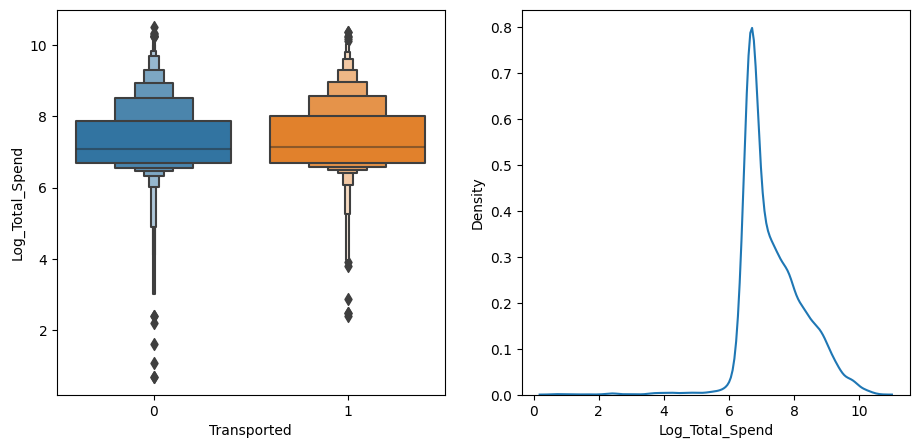

In [92]:
df_spend = tdata[tdata.Total_Spend>0]
fig,axs = plt.subplots(1,2, figsize = (11,5))
sns.boxenplot(data=df_spend, x="Transported", y="Log_Total_Spend", ax=axs[0])
sns.kdeplot(data=df_spend, x="Log_Total_Spend", ax=axs[1])


Lets get a basic binary tree and a random forest spun up!

Lets build a basic binary tree model on the survival rate.

First up, lets split the train dataset and get a validation set.

In [93]:
from sklearn.model_selection import train_test_split
trn_df, val_df = train_test_split(tdata, test_size=0.25)

Lets convert the df into category codes

In [94]:
trn_df[cat_vars] = trn_df[cat_vars].apply(lambda x: x.cat.codes if x.dtypes == 'category' else x)
val_df[cat_vars] = val_df[cat_vars].apply(lambda x: x.cat.codes if x.dtypes == 'category' else x)

In [95]:
trn_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
376,0413_01,0,0,F/92/P,2,18.0,0,0.0,157.0,0.0,...,Elina Steinardson,0,5,92,0,0413,0,1.0,569.0,6.345636
5393,5757_01,0,0,F/1195/P,2,23.0,0,0.0,0.0,0.0,...,Dianya Salin,0,5,1195,0,5757,0,1.0,559.0,6.327937
3000,3247_01,0,0,E/202/P,2,25.0,0,764.0,16.0,0.0,...,Harvin Malliamsey,0,4,202,0,3247,0,1.0,788.0,6.670766
3352,3608_02,1,1,D/122/P,2,16.0,0,0.0,0.0,0.0,...,Alhail Mormonized,1,3,122,0,3608,1,3.0,0.0,0.000000
5116,5466_03,1,0,B/185/P,2,6.0,0,0.0,0.0,0.0,...,Alballa Boltund,1,1,185,0,5466,2,5.0,0.0,0.000000


Time to get the xs and ys separated out.

In [96]:
def xs_y(df,cats, conts, dep):
    xs = df[cats + conts].copy()
    return xs, df[dep] if dep[0] in df.columns else None

trn_xs, trn_y = xs_y(trn_df, cats=cat_vars, conts=cont_vars, dep=dep_vars)
val_xs, val_y = xs_y(val_df, cats=cat_vars, conts=cont_vars, dep=dep_vars)

In [97]:
trn_xs.head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend
376,0,0,2,0,5,0,0,18.0,0.0,157.0,0.0,352.0,60.0,1.0,6.345636
5393,0,0,2,0,5,0,0,23.0,0.0,0.0,0.0,558.0,1.0,1.0,6.327937
3000,0,0,2,0,4,0,0,25.0,764.0,16.0,0.0,8.0,0.0,1.0,6.670766
3352,1,1,2,0,3,0,1,16.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000
5116,1,0,2,0,1,0,2,6.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000


In [98]:
trn_y.head()

,Transported
376,0
5393,0
3000,0
3352,1
5116,1


Simplest model in the world. If in CryoSleep, you get transported.

In [99]:
preds = val_xs.CryoSleep==0

Lets check the accuracy

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.7240110395584176

Now lets get to a tree

In [101]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y)

Lets plot the tree!

In [102]:
!pip install graphviz


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [103]:
!brew install graphviz

==> Downloading https://formulae.brew.sh/api/formula.jws.json

==> Downloading https://formulae.brew.sh/api/cask.jws.json

To reinstall 9.0.0, run:
  brew reinstall graphviz


In [104]:
import graphviz
import re

# Boiler plate code
def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

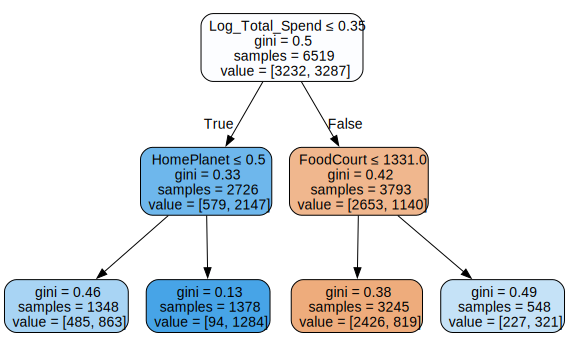

In [105]:
draw_tree(m, trn_xs, size=10)

In [106]:
mean_absolute_error(val_y, m.predict(val_xs))

0.2516099356025759

Go big or go home!

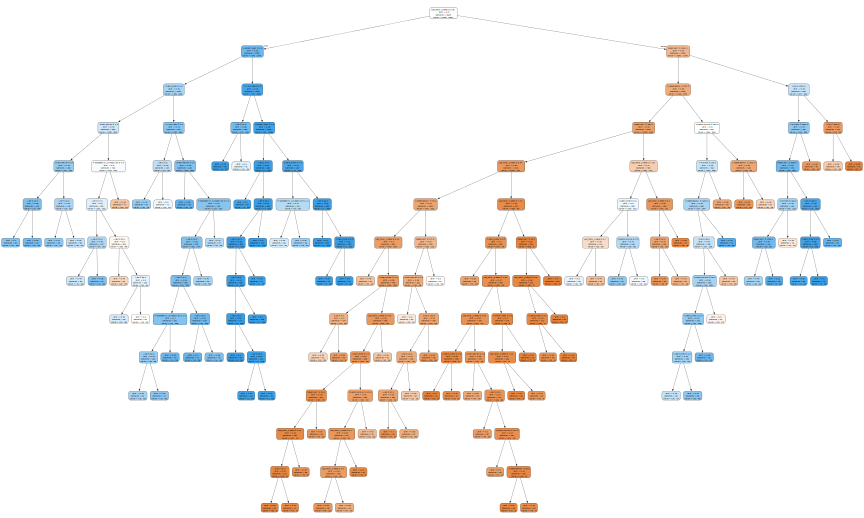

In [107]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [108]:
mean_absolute_error(val_y, m.predict(val_xs))

0.20975160993560257

Lets find out what is going on. Time to plot the relative importance of each column.

<Axes: ylabel='cols'>

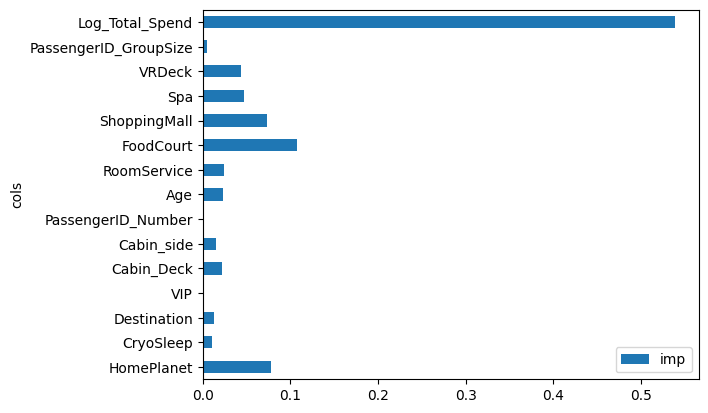

In [109]:
pd.DataFrame(dict(cols = trn_xs.columns, imp = m.feature_importances_)).plot('cols', 'imp', 'barh')

Ok lets get a RandomForest model going

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y)
mean_absolute_error(val_y, rf.predict(val_xs))

/Users/rohitzacharia/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.19411223551057957

Slightly better than before.

<Axes: ylabel='cols'>

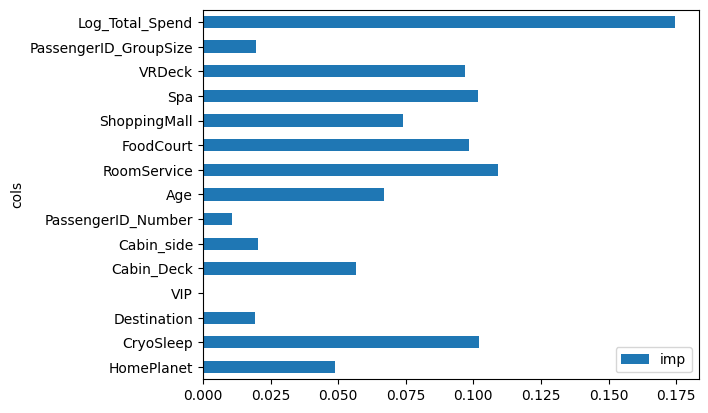

In [111]:
pd.DataFrame(dict(cols = val_xs.columns, imp = rf.feature_importances_)).plot('cols', 'imp', 'barh')

Lets get this new random forest method into Kaggle and see how we did.

In [112]:
test_df = pd.read_csv('test.csv')
test_df.describe (include = 'all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [113]:
add_features(test_df)
make_category (test_df, cat_vars)
test_df[cat_vars] = test_df[cat_vars].apply(lambda x: x.cat.codes if x.dtypes == 'category' else x)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,...,0.0,Nelly Carsoning,6,3,1,0013,0,0.0,0.0,0.000000
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,...,0.0,Lerome Peckers,5,4,1,0018,0,0.0,2832.0,7.949091
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,2,0,1,0019,0,0.0,0.0,0.000000
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,2,1,1,0021,0,0.0,7418.0,8.911800
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,...,0.0,Brence Harperez,5,5,1,0023,0,0.0,645.0,6.470800


Lets check the test_df and make sure its comparable to the training set.

In [114]:
# traincolumns = set(tdata.columns).remove('Transported')
traincolumns = set(trn_xs.columns)
testcolumns = set(test_df.columns)

testcolumns == traincolumns

False

In [115]:
remove_cols = testcolumns - traincolumns
remove_cols

{'Cabin',
 'Cabin_number',
 'Name',
 'PassengerID_Group',
 'PassengerId',
 'Total_Spend'}

In [116]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Cabin_Deck,Cabin_number,Cabin_side,PassengerID_Group,PassengerID_Number,PassengerID_GroupSize,Total_Spend,Log_Total_Spend
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,...,0.0,Nelly Carsoning,6,3,1,0013,0,0.0,0.0,0.000000
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,...,0.0,Lerome Peckers,5,4,1,0018,0,0.0,2832.0,7.949091
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,2,0,1,0019,0,0.0,0.0,0.000000
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,2,1,1,0021,0,0.0,7418.0,8.911800
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,...,0.0,Brence Harperez,5,5,1,0023,0,0.0,645.0,6.470800


In [117]:
test_df_xs = test_df.drop(columns=list(remove_cols))
# for col in remove_cols:
#     if col in test_df.columns:
#         test_df.drop(col)
testcolumns = set(test_df_xs.columns)
testcolumns == traincolumns
# test_df.head()

True

In [118]:
test_df_xs.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_side,PassengerID_Number,PassengerID_GroupSize,Log_Total_Spend
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,1,0,0.0,0.000000
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,1,0,0.0,7.949091
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,1,0,0.0,0.000000
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,0,0.0,8.911800
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1,0,0.0,6.470800


In [119]:
trn_xs.head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend
376,0,0,2,0,5,0,0,18.0,0.0,157.0,0.0,352.0,60.0,1.0,6.345636
5393,0,0,2,0,5,0,0,23.0,0.0,0.0,0.0,558.0,1.0,1.0,6.327937
3000,0,0,2,0,4,0,0,25.0,764.0,16.0,0.0,8.0,0.0,1.0,6.670766
3352,1,1,2,0,3,0,1,16.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000
5116,1,0,2,0,1,0,2,6.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000


Ok so now we need to rearrange the columns to match.

In [120]:
list(trn_xs.columns)

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin_Deck',
 'Cabin_side',
 'PassengerID_Number',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'PassengerID_GroupSize',
 'Log_Total_Spend']

In [121]:
test_df_xs = test_df_xs[list(trn_xs.columns)]
test_df_xs.head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_side,PassengerID_Number,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerID_GroupSize,Log_Total_Spend
0,0,1,2,0,6,1,0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0,0,2,0,5,1,0,19.0,0.0,9.0,0.0,2823.0,0.0,0.0,7.949091
2,1,1,0,0,2,1,0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1,0,2,0,2,1,0,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,8.911800
4,0,0,2,0,5,1,0,20.0,10.0,0.0,635.0,0.0,0.0,0.0,6.470800


Turns out random forests don't like NaNs, so we need to address this.

In [131]:
test_df_xs.isnull().sum()
test_df_xs = test_df_xs.fillna(value=0)

In [132]:
test_df_xs.isnull().sum()

HomePlanet               0
CryoSleep                0
Destination              0
VIP                      0
Cabin_Deck               0
Cabin_side               0
PassengerID_Number       0
Age                      0
RoomService              0
FoodCourt                0
ShoppingMall             0
Spa                      0
VRDeck                   0
PassengerID_GroupSize    0
Log_Total_Spend          0
dtype: int64

In [133]:
def sub_csv(tst_df, preds, suff):
    tst_df['Transported'] = preds
    sub_df = tst_df[['PassengerId','Transported']]
    sub_df.to_csv(f'sub-{suff}.csv', index=False)

test_preds = rf.predict(test_df_xs)

sub_csv(test_df, test_preds, 'rf_tree')

In [134]:
!head sub-tree.csv 

PassengerId,Transported
0013_01,1
0018_01,0
0019_01,1
0021_01,1
0023_01,1
0027_01,1
0029_01,0
0032_01,1
0032_02,1


Lets get to submitting!!

In [135]:
!kaggle competitions submit -f sub2.csv -m "Third submission to Kaggle. RF_Tree" spaceship-titanic

100%|███████████████████████████████████████| 56.4k/56.4k [00:00<00:00, 143kB/s]
Successfully submitted to Spaceship Titanic

In [136]:
!kaggle competitions leaderboard spaceship-titanic --show | grep -E -n -e "Zach Zacharia" | tail -n 1

588:10891694  Zach Zacharia                                   2023-09-25 20:31:24  0.79985  
